In [63]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv


# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)





Python version 2.7.16 |Anaconda, Inc.| (default, Sep 24 2019, 21:51:30) 
[GCC 7.3.0]
Pandas version 0.24.2
Matplotlib version 2.2.3


In [64]:
#read file
train = pd.read_csv("train.csv")

In [56]:
#create column for count room_type
train['One']=1

In [57]:
#list with room type and column One
typeF_room = list(zip(train.room_typeF,train.One))
typeM_room = list(zip(train.room_typeM,train.One))
typeA_room = list(zip(train.room_typeM,train.One))

In [58]:
#list and array with room type and id for every month

df=list(zip(train.idF,train.room_typeF))
df1=pd.DataFrame(data = df, columns=['id','room_typeF'])

df=list(zip(train.idM,train.room_typeM))
df2=pd.DataFrame(data = df, columns=['id','room_typeM'])

df=list(zip(train.idA,train.room_typeA))
df3=pd.DataFrame(data = df, columns=['id','room_typeA'])

#merge for id
df4=pd.merge(df1, df2,how='outer')
df4=pd.merge(df4, df3,how='outer')

#list and array for room_type after merge
df=list(zip(df4.room_typeF,df4.room_typeM,df4.room_typeA))
dfall=pd.DataFrame(data=df,columns=['room_typeF','room_typeM','room_typeA'])


#list and array for every month 
df=list(zip(df4.id,df4.room_typeF))
df1=pd.DataFrame(data = df, columns=['id','room_type'])

df=list(zip(df4.id,df4.room_typeM))
df2=pd.DataFrame(data = df, columns=['id','room_type'])

df=list(zip(df4.id,df4.room_typeA))
df3=pd.DataFrame(data = df, columns=['id','room_type'])

#sunxwneusi
df4 = df1.combine_first(df2)
dall=df3.combine_first(df4)

#without NaN
dall = dall[dall['room_type'].notna()]


In [59]:
#create column one for count roomtype, and add with room_type
dall['One']=1

df=list(zip(dall.room_type , dall.One ))
df2=pd.DataFrame(data = df, columns=['room_type','One'])

In [60]:
#find the count for every room_type
df_row = pd.DataFrame(data = df2.groupby(['room_type']).sum())

In [61]:
#do array again
dall=df_row.reset_index()



The most popular name


,room_type,One
0,Entire home/apt,8600
1,Private room,1141
2,Shared room,55


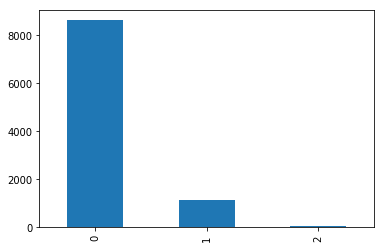

In [62]:
#create diagram
dall['One'].plot.bar()

print("The most popular name")
dall.sort_values(by='One', ascending=False)